In [1]:
# Importing all the necessaries libraries

import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm

In [2]:
# This is the function definition of the Exo-SIR Model that we designed
# ODEs

def Exo_SIR_model(y, t, beta_x, beta_e, gamma):
    s, i_x, i_e, r = y
    
    i = i_x+i_e
    ds__dt = -beta_x*s-beta_e*s*i
    dix__dt = beta_x*s-gamma*i_x
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i
    
    return([ds__dt, dix__dt, die__dt, dr__dt])

In [3]:
# This is the time series data which we're going to work on 

data1 = pd.read_csv('E:\\Docs & Files\\SMA\\3. SIR model for COVID-19\\Nirmal sir extracts\\Kerala_time_series.csv')
data1

,Date,Daily Conf,Total Conf,Daily Rec,Total Rec,Daily Death,Total Death,DR,TR,Imported_daily,Imported_total
0,14 March,19,19,3,3,0,0,3,3,0,0
1,15 March,5,24,0,3,0,0,0,3,2,2
2,16 March,3,27,0,3,0,0,0,3,3,5
3,17 March,0,27,0,3,0,0,0,3,0,5
4,18 March,0,27,0,3,0,0,0,3,0,5
5,19 March,1,28,0,3,0,0,0,3,1,6
6,20 March,12,40,0,3,0,0,0,3,8,14
7,21 March,12,52,0,3,0,0,0,3,12,26
8,22 March,15,67,0,3,0,0,0,3,15,41
9,23 March,28,95,0,3,0,0,0,3,28,69


In [4]:
# Renaming the columns

data1.columns = ['Date','DC','TC','Daily Recovered','Total Recovered','DD','TD','DR','TR','Imp_DC','Imp_TC']
data1.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC
0,14 March,19,19,3,3,0,0,3,3,0,0
1,15 March,5,24,0,3,0,0,0,3,2,2
2,16 March,3,27,0,3,0,0,0,3,3,5
3,17 March,0,27,0,3,0,0,0,3,0,5
4,18 March,0,27,0,3,0,0,0,3,0,5


In [5]:
# Calculating daywise S(susceptible number) adding it to the dataset

N = 35125000 # 3.51 Crores

Sus = N - data1.TC - data1.TR
data1['S'] = Sus
data1.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970


In [6]:
# Adding fraction of susceptible number(s=S/N) column to the data set

sus = data1.S/N
data1['s'] = sus
data1.head()

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S,s
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978,0.999999
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973,0.999999
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970,0.999999
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999


In [7]:
# Subsetting the datframe to contain the range of dates required for analysis

data = data1[:]
data

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S,s
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978,0.999999
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973,0.999999
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970,0.999999
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999
5,19 March,1,28,0,3,0,0,0,3,1,6,35124969,0.999999
6,20 March,12,40,0,3,0,0,0,3,8,14,35124957,0.999999
7,21 March,12,52,0,3,0,0,0,3,12,26,35124945,0.999998
8,22 March,15,67,0,3,0,0,0,3,15,41,35124930,0.999998
9,23 March,28,95,0,3,0,0,0,3,28,69,35124902,0.999997


In [8]:
# Finding the fraction of infections on day to the sum of infections on all days under study

daywise_fractions = []
for inf in data.DC:
    daywise_fractions.append(inf/sum(data.DC))
daywise_fractions

[0.04909560723514212,
 0.012919896640826873,
 0.007751937984496124,
 0.0,
 0.0,
 0.002583979328165375,
 0.031007751937984496,
 0.031007751937984496,
 0.03875968992248062,
 0.07235142118863049,
 0.03617571059431524,
 0.023255813953488372,
 0.04909560723514212,
 0.10077519379844961,
 0.015503875968992248,
 0.05167958656330749,
 0.082687338501292,
 0.01808785529715762,
 0.06201550387596899,
 0.05426356589147287,
 0.023255813953488372,
 0.028423772609819122,
 0.020671834625323,
 0.03359173126614987,
 0.023255813953488372,
 0.023255813953488372,
 0.031007751937984496,
 0.01808785529715762,
 0.025839793281653745,
 0.00516795865633075,
 0.007751937984496124,
 0.020671834625323]

In [9]:
# Finding the probable day-wise distribution of total number of infections due to Tablighi Jamaat, using the fractions computed earlier 
# Assumption made is that number of infections due to the Tablighi event, are also distributed in the same trend and are contained
# in the number of daily infections already present in the dataset

I_X_Kerala = 15
daywise_cases = []
for i in daywise_fractions:
    daywise_cases.append(I_X_Kerala*i)
daywise_cases

[0.7364341085271318,
 0.19379844961240308,
 0.11627906976744186,
 0.0,
 0.0,
 0.03875968992248062,
 0.46511627906976744,
 0.46511627906976744,
 0.5813953488372093,
 1.0852713178294573,
 0.5426356589147286,
 0.3488372093023256,
 0.7364341085271318,
 1.5116279069767442,
 0.23255813953488372,
 0.7751937984496123,
 1.2403100775193798,
 0.2713178294573643,
 0.9302325581395349,
 0.813953488372093,
 0.3488372093023256,
 0.42635658914728686,
 0.31007751937984496,
 0.5038759689922481,
 0.3488372093023256,
 0.3488372093023256,
 0.46511627906976744,
 0.2713178294573643,
 0.38759689922480617,
 0.07751937984496124,
 0.11627906976744186,
 0.31007751937984496]

In [10]:
# The variable daywise_cases stores the distribution of infections caused due to Tablighi event in a daywise manner
# Checking if their sum is accurately adding up to the number contained in I_X_Raj and if that is lesser than total number 
# of infections contained in the dataset till the date of study

print(sum(daywise_cases))
print(sum(data.DC))

15.000000000000007
387


In [11]:
# Adding the daily distribution of infections due to the Tablighi Jamaat which was just found, as a column to the dataframe

data['TB_DC'] = daywise_cases
data.head()

C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S,s,TB_DC
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978,0.999999,0.736434
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973,0.999999,0.193798
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970,0.999999,0.116279
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000


In [12]:
# Computing the cumulative values of infections due to Tablighi Jamaat using the daily distribution that was just created

cum_tb_cases = [data.loc[0,'TB_DC']]
for it in range(1,32):
    cum_tb_cases.append(cum_tb_cases[it-1]+data.TB_DC[it])
cum_tb_cases

[0.7364341085271318,
 0.9302325581395349,
 1.0465116279069768,
 1.0465116279069768,
 1.0465116279069768,
 1.0852713178294575,
 1.550387596899225,
 2.0155038759689923,
 2.5968992248062017,
 3.6821705426356592,
 4.224806201550388,
 4.573643410852713,
 5.3100775193798455,
 6.82170542635659,
 7.054263565891474,
 7.829457364341086,
 9.069767441860465,
 9.34108527131783,
 10.271317829457365,
 11.085271317829458,
 11.434108527131784,
 11.860465116279071,
 12.170542635658917,
 12.674418604651166,
 13.023255813953492,
 13.372093023255818,
 13.837209302325586,
 14.108527131782951,
 14.496124031007758,
 14.57364341085272,
 14.689922480620162,
 15.000000000000007]

In [13]:
# Adding the cumulative infections as a column to the dataset

data['TB_TC'] = cum_tb_cases
data.head()

C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978,0.999999,0.736434,0.736434
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973,0.999999,0.193798,0.930233
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970,0.999999,0.116279,1.046512
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000,1.046512
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000,1.046512


In [14]:
# Adding I_X (number of exogenous infections), I_E(number of endogenous infections), i_x(fraction of I_X), i_e(fraction of I_E) 
# as columns to the dataset
# All the values being calculated are cumulative
# I_X = Imported infections + infections due to Tablighi Jamaat
# Total infections = I_X + I_E

I_X = data.Imp_TC + data.TB_TC
data['I_X'] = I_X
I_E = data.TC - data.I_X
data['I_E'] = I_E

i_x = I_X/N
i_e = I_E/N
data['i_x'] = i_x
data['i_e'] = i_e

data.head()

C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC,I_X,I_E,i_x,i_e
0,14 March,19,19,3,3,0,0,3,3,0,0,35124978,0.999999,0.736434,0.736434,0.736434,18.263566,2.096610e-08,5.199592e-07
1,15 March,5,24,0,3,0,0,0,3,2,2,35124973,0.999999,0.193798,0.930233,2.930233,21.069767,8.342299e-08,5.998510e-07
2,16 March,3,27,0,3,0,0,0,3,3,5,35124970,0.999999,0.116279,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07
3,17 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07
4,18 March,0,27,0,3,0,0,0,3,0,5,35124970,0.999999,0.000000,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07


In [15]:
# Adding i(fraction of cumulative infections), r(fraction of cumulative recoveries), di/dt(fraction of difference in cumulative infections i.e daily infections) 
# and dr/dt(similarly...fraction of daily recoveries) columns to the dataset
# as Number of cumulative values on nth day - Number of cumulative values on (n-1)th day = Number of new daily values on nth day

i = data.TC/N
data['i'] = i
r = data.TR/N
data['r'] = r

di_dt = data.DC/N
data['di_dt'] = di_dt
dr_dt = data.DR/N
data['dr_dt'] = dr_dt

data.head()

C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,TB_DC,TB_TC,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt
0,14 March,19,19,3,3,0,0,3,3,0,...,0.736434,0.736434,0.736434,18.263566,2.096610e-08,5.199592e-07,5.409253e-07,8.540925e-08,5.409253e-07,8.540925e-08
1,15 March,5,24,0,3,0,0,0,3,2,...,0.193798,0.930233,2.930233,21.069767,8.342299e-08,5.998510e-07,6.832740e-07,8.540925e-08,1.423488e-07,0.000000e+00
2,16 March,3,27,0,3,0,0,0,3,3,...,0.116279,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,8.540925e-08,0.000000e+00
3,17 March,0,27,0,3,0,0,0,3,0,...,0.000000,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00
4,18 March,0,27,0,3,0,0,0,3,0,...,0.000000,1.046512,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00


In [16]:
# Adding the dix/dt(fraction of daily exogenous infections) and die/dt(fraction of daily endogenous infections) columns to the dataset

dix_dt = [0]
die_dt = [0]

for i in range(1,32):
    temp1 = data.i_x[i]-data.i_x[i-1]
    temp2 = data.i_e[i]-data.i_e[i-1]
    
    if temp1>0:
        dix_dt.append(temp1)
    else:
        dix_dt.append(-1*temp1)
        
    if temp2>0:
        die_dt.append(temp2)
    else:
        die_dt.append(-1*temp2)
        
print(len(dix_dt))
print(len(die_dt))

data['dix_dt'] = dix_dt
data['die_dt'] = die_dt
data.head()

32
32


C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,14 March,19,19,3,3,0,0,3,3,0,...,0.736434,18.263566,2.096610e-08,5.199592e-07,5.409253e-07,8.540925e-08,5.409253e-07,8.540925e-08,0.000000e+00,0.000000e+00
1,15 March,5,24,0,3,0,0,0,3,2,...,2.930233,21.069767,8.342299e-08,5.998510e-07,6.832740e-07,8.540925e-08,1.423488e-07,0.000000e+00,6.245690e-08,7.989186e-08
2,16 March,3,27,0,3,0,0,0,3,3,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,8.540925e-08,0.000000e+00,8.871969e-08,3.310436e-09
3,17 March,0,27,0,3,0,0,0,3,0,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,18 March,0,27,0,3,0,0,0,3,0,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00


In [17]:
df1 = data
df1

,Date,DC,TC,Daily Recovered,Total Recovered,DD,TD,DR,TR,Imp_DC,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,14 March,19,19,3,3,0,0,3,3,0,...,0.736434,18.263566,2.096610e-08,5.199592e-07,5.409253e-07,8.540925e-08,5.409253e-07,8.540925e-08,0.000000e+00,0.000000e+00
1,15 March,5,24,0,3,0,0,0,3,2,...,2.930233,21.069767,8.342299e-08,5.998510e-07,6.832740e-07,8.540925e-08,1.423488e-07,0.000000e+00,6.245690e-08,7.989186e-08
2,16 March,3,27,0,3,0,0,0,3,3,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,8.540925e-08,0.000000e+00,8.871969e-08,3.310436e-09
3,17 March,0,27,0,3,0,0,0,3,0,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,18 March,0,27,0,3,0,0,0,3,0,...,6.046512,20.953488,1.721427e-07,5.965406e-07,7.686833e-07,8.540925e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
5,19 March,1,28,0,3,0,0,0,3,1,...,7.085271,20.914729,2.017159e-07,5.954371e-07,7.971530e-07,8.540925e-08,2.846975e-08,0.000000e+00,2.957323e-08,1.103479e-09
6,20 March,12,40,0,3,0,0,0,3,8,...,15.550388,24.449612,4.427157e-07,6.960744e-07,1.138790e-06,8.540925e-08,3.416370e-07,0.000000e+00,2.409998e-07,1.006373e-07
7,21 March,12,52,0,3,0,0,0,3,12,...,28.015504,23.984496,7.975944e-07,6.828326e-07,1.480427e-06,8.540925e-08,3.416370e-07,0.000000e+00,3.548788e-07,1.324174e-08
8,22 March,15,67,0,3,0,0,0,3,15,...,43.596899,23.403101,1.241193e-06,6.662804e-07,1.907473e-06,8.540925e-08,4.270463e-07,0.000000e+00,4.435984e-07,1.655218e-08
9,23 March,28,95,0,3,0,0,0,3,28,...,72.682171,22.317829,2.069243e-06,6.353830e-07,2.704626e-06,8.540925e-08,7.971530e-07,0.000000e+00,8.280504e-07,3.089740e-08


In [18]:
# Calculating day-wise Gamma for the set of days

Gamma = Gamma = df1.dr_dt / df1.i
print('daywise gamma for Kerala\n')
Gamma

daywise gamma for Kerala



0     0.157895
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.009174
11    0.000000
12    0.051095
13    0.000000
14    0.010989
15    0.019802
16    0.017094
17    0.020747
18    0.007547
19    0.006993
20    0.047458
21    0.026144
22    0.019108
23    0.009174
24    0.035714
25    0.037681
26    0.036415
27    0.074176
28    0.053476
29    0.095745
30    0.050132
31    0.033592
dtype: float64

In [19]:
# Calculating day-wise Beta_x for the set of days

Beta_x = (df1.dix_dt+Gamma*df1.i_x) / df1.s
print('daywise beta_x for Kerala')
Beta_x

daywise beta_x for Kerala


0     3.310438e-09
1     6.245694e-08
2     8.871976e-08
3     0.000000e+00
4     0.000000e+00
5     2.957326e-08
6     2.410000e-07
7     3.548793e-07
8     4.435993e-07
9     8.280527e-07
10    2.931537e-07
11    2.376901e-07
12    6.026598e-07
13    7.832534e-07
14    1.349089e-07
15    5.933453e-07
16    1.112654e-07
17    1.000693e-07
18    2.323854e-07
19    1.991866e-07
20    2.388572e-07
21    2.262111e-07
22    1.320491e-07
23    2.323567e-07
24    3.119413e-07
25    2.678819e-07
26    2.374847e-07
27    4.070832e-07
28    3.595222e-07
29    5.556080e-07
30    3.082279e-07
31    3.414957e-07
dtype: float64

In [20]:
# Calculating day-wise Beta_e for the set of days

Beta_e = (df1.die_dt+Gamma*df1.i_e)/(df1.s*df1.i)
print('daywise beta_e for Kerala')
Beta_e

daywise beta_e for Kerala


0     0.151775
1     0.116925
2     0.004307
3     0.000000
4     0.000000
5     0.001384
6     0.088372
7     0.008945
8     0.008678
9     0.011424
10    0.043147
11    0.005518
12    0.035268
13    0.065275
14    0.017920
15    0.015638
16    0.137146
17    0.035208
18    0.067312
19    0.055957
20    0.049527
21    0.036126
22    0.029815
23    0.023971
24    0.029891
25    0.036495
26    0.046663
27    0.054125
28    0.046450
29    0.049162
30    0.029482
31    0.023270
dtype: float64

In [26]:
# Calculating mean of Beta_x, Beta_e and Gamma for Kerala
 
beta_x_mean = st.mean(Beta_x)
beta_e_mean = st.mean(Beta_e)
gamma_mean = st.mean(Gamma)
print("the mean of Beta_x for Kerala \n",beta_x_mean)
print("the mean of Beta_e for Kerala \n",beta_e_mean)
print("the mean of Gamma for Kerala using actual cases\n",gamma_mean)

the mean of Beta_x for Kerala 
 2.799446562050013e-07
the mean of Beta_e for Kerala 
 0.04141173611520644
the mean of Gamma for Kerala using actual cases
 0.02562969161517916


# Plotting the predictions

In [22]:
# Solving the ODEs using Scipy
# Assigning initial values of infections, recoveries & susceptibles along with the three parameters beta_x, beta_e and gamma
# all which are input to the Exo_SIR funtion

S0 = df1.loc[31,'s']
IX0 = df1.loc[31,'i_x']
IE0 = df1.loc[31,'i_e']
R0 = df1.loc[31,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean

# time vector
t = np.linspace(0, 1300, 1300)


# Result
solution1 = scipy.integrate.odeint(Exo_SIR_model,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)

0.9999828896797153
5.665480427046264e-06
5.352313167259786e-06
6.092526690391459e-06


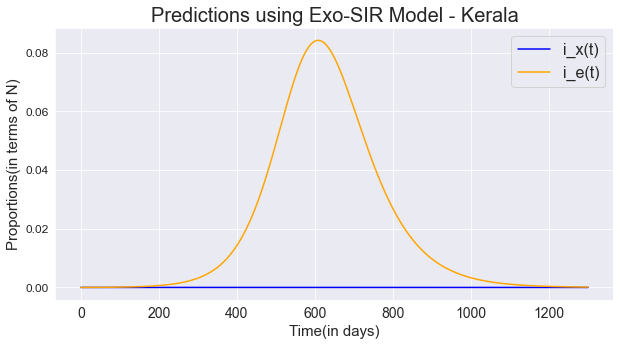

In [23]:
# Plotting the result

plt.figure(figsize = (10,5))
#plt.plot(t, solution1[:,0], label = 's(t)')
plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
plt.plot(t, solution1[:,2], label = 'i_e(t)', c='orange')
#plt.plot(t, solution1[:,3], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Kerala", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
plt.savefig('E:\\Docs & Files\\SMA\\4. Exo-SIR Model\\pred_Exo-SIR_Kerala_with_i_x.png')
plt.show()

## With i_x

In [24]:
# Finding the value of the peak which is seen in the plot above

max(solution1[:,2])

0.08424707974750728

In [25]:
# Finding the exact time slice(day on x-axis) when the peak occurs

list_r = list(solution1[:,2])
list_r.index(0.08424707974750728)

608